# Oración C

## Presentación

Este es un Shift Reduce Parser para una gramática capaz de generar la oración "Disparan armas que son falsas". Primero importamos las librerias nltk y re, el paquete de lingüística y expresiones regulares, respectivamente.

In [3]:
import nltk
import re

## Shift Reduce Parser

Presentamos el código correspondiente al SRP:

In [4]:
# Shift Reduce Parser

def sr_parser(oracion, gramatica):                   
    oracion = oracion.lower()
    
    if oracion.endswith('.'):
        oracion = re.sub('\.',' ',oracion)
    else:
        oracion = oracion
    lista_palabras = oracion.split()
    gramatica = nltk.data.load(gramatica)
    sr_parser = nltk.ShiftReduceParser(gramatica)   
    #sr_parser.trace(2)
    for arbol in sr_parser.parse(lista_palabras):
        print("- Este es el árbol resultante: ", arbol)
        return(arbol)                                

El siguiente código llamará al archivo "ORACIONC.cfg", una gramática encabezada por la forma convencional "S -> SN SV", aun con el sujeto de SN tácito. Nótese que sólo a través de una oración que contenga la palabra "pro" como terminal que sustituya al pronombre expresado en la token del verbo "disparan" podría llegarse a una sustitución del SN, debemos también introducirlo en la oración que escribimos. No hacerlo resultará en un parseo incompleto, como puede demostrarse descomentando la función "sr_parser.trace(2)", que llegará sólo hasta el SV.

Escribí una oración:
pro disparan armas que son falsas
- Este es el árbol resultante:  (S
  (SN (PRO pro))
  (SV
    (V disparan)
    (FN (N armas) (PSO (NS que) (T (Vs son) (SA (A falsas)))))))


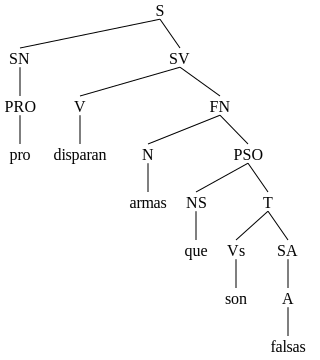

In [5]:
print('Escribí una oración:')
oracion2 = input()
gramatica = 'ORACIONC.cfg'
sr_parser(oracion2, gramatica)

Si, en cambio, nuestra gramática se da sin el SN implícito al comienzo, el parseo se completa sin agregar palabras. 

Escribí una oración:
disparan armas que son falsas
- Este es el árbol resultante:  (S
  (SV
    (V disparan)
    (FN (N armas) (PSO (NS que) (T (Vs son) (SA (A falsas)))))))


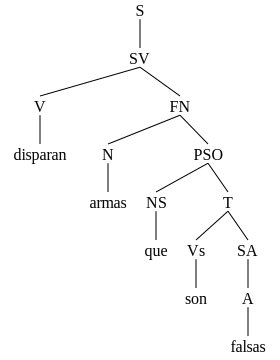

In [6]:
print('Escribí una oración:')
oracion2 = input()
gramatica = 'ORACIONC2.cfg'
sr_parser(oracion2, gramatica)